## Assignment 2  ME 781  (Data Scale)

### Perform the following tasks in sequence:

1. Create a list of 5 open data sets available for machine learning along with their links for each of the three Data Types (Discrete data Type, Sequential (temporal) data Type and Spatial data Type)


2. Write a python code to input a dataset (csv file) of Discrete data type, automatically identify and print the

    a. Number of attributes and number of entries
    
    b. Data scale of each attribute
    
    c. Data value of each attribute


3.      Write a python code to perform statistics on each data column based on its data scale.


4.      Can we use a box plot for visualizing ordinal data? (Yes/No). Explain why. 

![MicrosoftTeams-image2.png](attachment:MicrosoftTeams-image2.png)


5.      Write a python code to visualize data in the csv file (a generalized method depending upon data scale) 

    Assignment instructions:
    1. Naming convention: Please name your colab files as rollnumber_A2.ipynb. 
    2. Learn how to use markdown to add texts in colab to make your code interactive and understandable. 
    3. After completion of your assignment download the file as .ipynb and submit itusing Teams assignment tab.

  ###  We have a software to check plagiarism in code, if anyone found copying the code, strict action will be taken against such students and can also be given FR grade directly.
    
  We  expect  you  to  upload  colab  notebooks  when  you  are  required  to  turn  your  programming assignments.  Please  make  sure  that  you  provide  enough  comments  in  the  code  for  the TAs to understand 
       

### Libraries

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import requests

### 1. List of 5 open Data sets

In [22]:
## Paste the URLs of open datasets here and add comments describing the dataset

# The dataset below has six input features (both numerical and categorical) describing a star.
# The dataset is used for the task of predicting star-type (multi-class classification).
# Since the order of collection of features for a particular data-point doesn't matter,
# and since there is no order between data-points, this dataset is of DISCRETE DATATYPE.
url1 = "https://www.kaggle.com/deepu1109/star-dataset"

## The English Penn Treebank (PTB) corpus is used for tasks like sequence labeling, Part-of-Speech tagging, and
# for character-level and word-level Language Modelling. Thus, the dataset is clearly of the SEQUENCIAL DATATYPE
# , as the order of collection of words in the corpus matters, and is also one-directional in nature.
url2 = "https://paperswithcode.com/dataset/penn-treebank"

# Stanford Question Answering Dataset (SQuAD) is a reading comprehension dataset where the main task is
# to answer questions posed from the passage using a span of text from the passage itself. Since this dataset is
# also language-based, it is of the SEQUENCIAL DATATYPE, as the order of words in the passages
# matters, and the collection is one-directional in nature.
url3 = "https://rajpurkar.github.io/SQuAD-explorer/"

# The CIFAR-10 dataset contains tiny images from 10 classes for the image classification task. Due to its
# lightweight nature, it is often the first choice for quick testing of new models / techniques or for
# educational purposes. This dataset is of SPECIAL DATATYPE type as it consists of images, which have a 
# multi-dimensional order of collection.
url4 = "https://www.cs.toronto.edu/~kriz/cifar.html"

# ImageNet is the most famous benchmark for image classification and object detection. This dataset is also
# of SPATIAL DATATYPE as it consists of images, which have a multi-dimensional order of collection.
url5 = "https://image-net.org/challenges/LSVRC/"

### 2.   Write a python code to input a dataset (csv file) of Discrete datatype, automatically identify and print the

    a. Number of attributes and number of data points
    
    b. Data scale of each attribute
    
    c. Data value of each attribute

#### Note: The number of categories for categorical (nominal,ordinal) data scale for the evaluating datasets is not greater than 8.

In [63]:
def data_description(filename,isprint=True):
    ## Write a well commented function that inputs dataset file location (.csv file) and outputs the following
    ## 1. data_scale (of length = number of attributes)
    ## 2. data_value (of length = number of attributes)
    ## 3. imported dataset for later use
    ## It should also print those details for each attribute(Output must be similar to what is mentioned below)
    
    '''
    Args:
    filename(str): path or name of file
    verbose(bool,optional) : function don't print t
    '''
    data = pd.read_csv(filename)
    if isprint:
        print(f"This Dataset Contains {len(data)} entries, each with {len(data.columns)} Attributes")
     
    data_scale, data_value = {},{}
    for i,attribute in enumerate(data.columns):
        if len(data[attribute].unique()) < 8:
            if data[attribute].dtype == object :
              scale = "nominal"
            else: 
              scale = "ordinal"
            t = "discrete"

        else:
           scale = "ratio"
           if "float" in str(data[attribute].dtype).lower():
             t = "continuous" 
           else:
             t = "discrete"
        data_scale[attribute], data_value[attribute] = scale, t
        if isprint:
           print(f'{i} {attribute} : {scale}, {t}')
    
    return data_scale, data_value, data

In [48]:
data_scale, data_value, data = data_description("/content/drive/MyDrive/ME781/Assignment-2/A2_example_dataset - students_demo_debae1c8ec9dfd7d35c9cbba87d8dee8.csv")

This Dataset Contains 649 entries, each with 6 Attributes
0 gender : nominal, discrete
1 age : ratio, discrete
2 health_rating : ordinal, discrete
3 StudentIQ : ratio, discrete
4 no_of_courses : ratio, discrete
5 Marks : ratio, continuous


    Output must similar to this:
    
    This dataset contains 649 entries, each with 6 attributes

    0 gender : nominal, discrete
    1 age : ratio, discrete
    2 health_rating : ordinal, discrete
    3 StudentIQ : ratio, discrete
    4 no_of_courses : ratio, discrete
    5 Marks : ratio, continuous


### 3. Write a python code to perform statistics on each data column based on its data scale.

In [64]:
def stats(filename):
    ## Write a well commented function that calls the function data_description and prints
    ## relevant statistics based on data scale.
    ## Hint: Explore describe()

    """Prints attribute-level summary of input data.

    Args:
        filename (str): path of file for which data stats are needed
    """
    data_scale, _ , data = data_description(filename,isprint=False)    #output of data_description is stored
    D = data.describe()      #describe as Dataframe names D

    def print_nominal_stats(attribute):      #Defining function to describe nominal datatype columns
        """Generates stats for nominal and ordinal data scales.
           1)mode
           2)median
        """        
        print('mode', data[attribute].mode()[0])    #Printing mode
        if data_scale[attribute] == 'ordinal':   #if  attribute is ordinal then median also can be a stat
            print('median', data[attribute].median())  #Printing median
        print(data[attribute].value_counts().sort_index())

    def print_ratio_stats(attribute):        #Defining function to describe nominal datatype columns
        """Generates stats for ratio data scale.
            1)mean      
            2)std       
            3)min       
            4)25%       
            5)median    
            6)75%       
            7)max       
        """
        data1 = D[attribute].copy()            
        data1.index = ['mode', 'mean', 'std', 'min', '25%', 'median', '75%', 'max']
        data1['mode'] = data[attribute].mode()[0]
        print(data1)
    
    #After defining Individual Function for datatypes, Now this loop below will print all the
    #Stat-corresponding to its datatype
    for attribute in data.columns:
        print(attribute)
        if data_scale[attribute] in {'nominal', 'ordinal'}:
            print_nominal_stats(attribute) # get norminal / ordinal data stats
        else:
            print_ratio_stats(attribute) # get ratio data stats
        print()    # to put blank line between two data description
    return
    

In [65]:
stats("/content/drive/MyDrive/ME781/Assignment-2/A2_example_dataset - students_demo_debae1c8ec9dfd7d35c9cbba87d8dee8.csv")

gender
mode F
F    383
M    266
Name: gender, dtype: int64

age
mode      17.000000
mean      16.744222
std        1.218138
min       15.000000
25%       16.000000
median    17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

health_rating
mode 5
median 4.0
1     90
2     78
3    124
4    108
5    249
Name: health_rating, dtype: int64

StudentIQ
mode      104.000000
mean      100.229584
std        10.256494
min        75.000000
25%        93.000000
median    101.000000
75%       107.000000
max       131.000000
Name: StudentIQ, dtype: float64

no_of_courses
mode      17.000000
mean      10.596302
std        5.714697
min        1.000000
25%        5.000000
median    11.000000
75%       16.000000
max       20.000000
Name: no_of_courses, dtype: float64

Marks
mode      52.810000
mean      75.137257
std       14.559722
min       50.120000
25%       62.560000
median    75.120000
75%       87.670000
max       99.860000
Name: Marks, dtype: float64



    Output must be some what similar to this:

    gender
    mode F
    F    383
    M    266
    Name: gender, dtype: int64 

    age
    mode      17.000000
    mean      16.744222
    std        1.218138
    min       15.000000
    25%       16.000000
    median    17.000000
    75%       18.000000
    max       22.000000
    Name: age, dtype: float64 

    health_rating
    mode   5
    median 4
    1     90
    2     78
    3    124
    4    108
    5    249
    Name: health_rating, dtype: int64 

    StudentIQ
    mode     104.000000
    mean     100.229584
    std       10.256494
    min       75.000000
    25%       93.000000
    median   101.000000
    75%      107.000000
    max      131.000000
    Name: StudentIQ, dtype: float64 

    no_of_courses
    mode      17.000000
    count    649.000000
    mean      10.596302
    std        5.714697
    min        1.000000
    25%        5.000000
    median    11.000000
    75%       16.000000
    max       20.000000
    Name: no_of_courses, dtype: float64 

    Marks
    mode      52.810000
    count    649.000000
    mean      75.137257
    std       14.559722
    min       50.120000
    25%       62.560000
    median    75.120000
    75%       87.670000
    max       99.860000
    Name: Marks, dtype: float64 

### 4. Can we use a box plot for visualizing ordinal data ? (Yes/No). Explain why.
![MicrosoftTeams-image2.png](attachment:MicrosoftTeams-image2.png)

**No**, because Box plots are ways for summarizing data on an interval scale, as they are useful for showing the distribution, quartiles and variability of the data. Since ordinal data doesn't support addition/subtraction, it can't have interval nature and thus there is no sense of variablility or mean in such data. Thus, boxplot is mainly used for numerical data, which is of interval scale

###   5.  Write a python code to visualize the data (a generalized method depending on data scale) 

In [68]:
def visualize_data(filename):
        ## Write a well commented function that can call any of the functions from above 
        ## to plot relevant plots
        ## Hint: Use sns.distplot, sns.countplot. Make a new figure for each plot (plt.figure(i))
    
    """Visualizes attribute data based on detected data_scale.

    Args:
        filename (str): path of file for which data stats are needed
    """
    data_scale, data_value , data = data_description(filename, isprint=False) # Get data description, supress output

    for attribute in data.columns:
        plt.figure() # Create a new figure for each attribute's plot.
        plt.title(f'Data Attribute: {attribute}')
        if data_scale[attribute] in {'nominal', 'ordinal'}:
            sns.countplot(data[attribute]) # Count plot for nominal and ordinal data
        else:
            sns.distplot(data[attribute]) # Distplot for ratio data. # can also disable kde fit for discrete
    plt.show() # Display all plots
    return
        

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/li

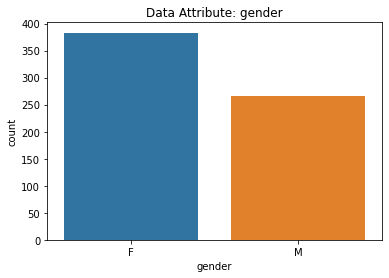

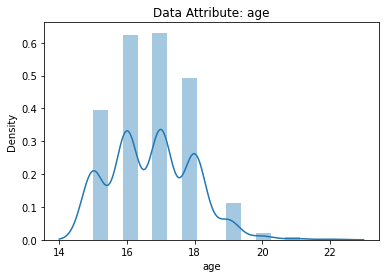

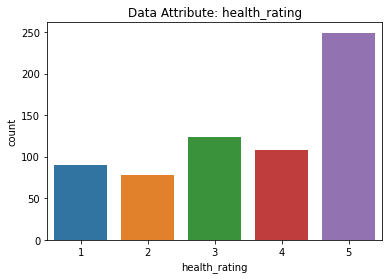

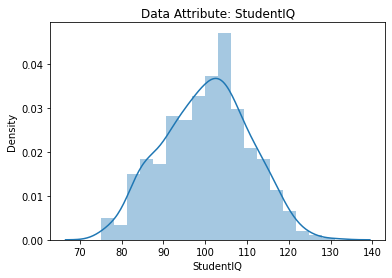

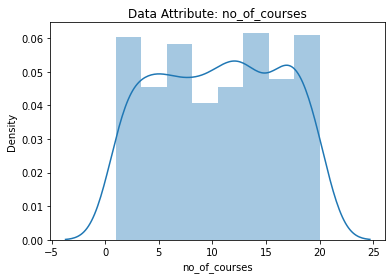

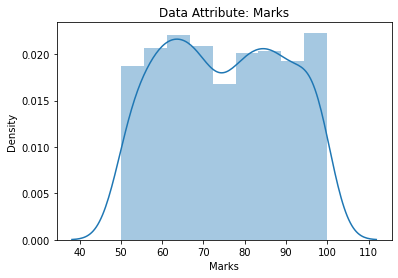

In [69]:
visualize_data("/content/drive/MyDrive/ME781/Assignment-2/A2_example_dataset - students_demo_debae1c8ec9dfd7d35c9cbba87d8dee8.csv")